In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
df = pd.read_csv("day_wise.csv")

In [3]:
df.head()
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,188,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
unique,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,NaN,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,NaN,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,NaN,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,NaN,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,NaN,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000


In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    188 non-null    datetime64[ns]
 1   Confirmed               188 non-null    int64         
 2   Deaths                  188 non-null    int64         
 3   Recovered               188 non-null    int64         
 4   Active                  188 non-null    int64         
 5   New cases               188 non-null    int64         
 6   New deaths              188 non-null    int64         
 7   New recovered           188 non-null    int64         
 8   Deaths / 100 Cases      188 non-null    float64       
 9   Recovered / 100 Cases   188 non-null    float64       
 10  Deaths / 100 Recovered  188 non-null    float64       
 11  No. of countries        188 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory 

In [7]:
df.isna().sum()


Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

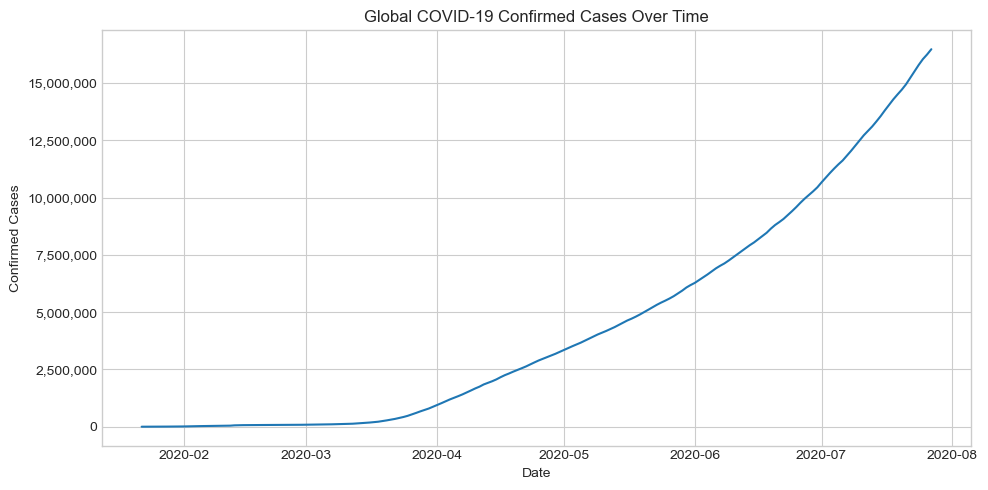

In [11]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Confirmed"])
plt.title("Global COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


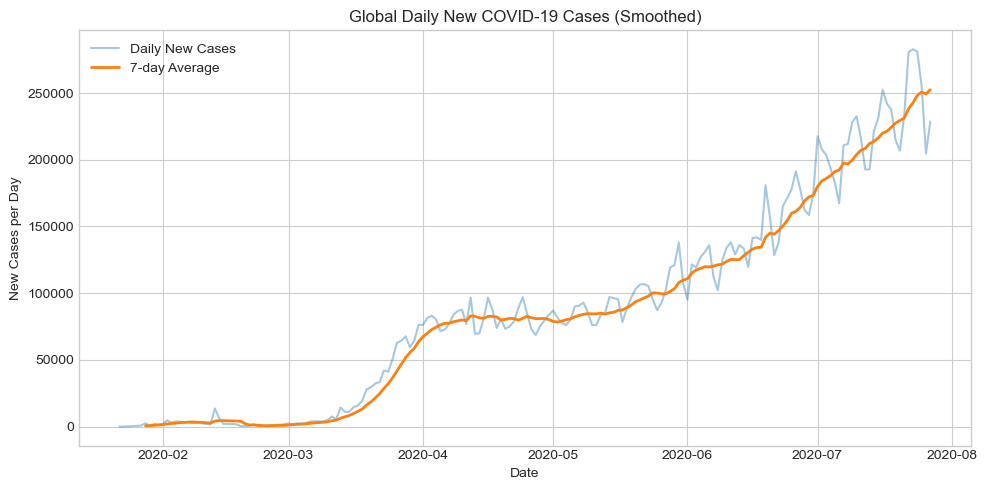

In [13]:
df["New_cases_7day_avg"] = df["New cases"].rolling(7).mean()

plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["New cases"], alpha=0.4, label="Daily New Cases")
plt.plot(df["Date"], df["New_cases_7day_avg"], linewidth=2, label="7-day Average")
plt.title("Global Daily New COVID-19 Cases (Smoothed)")
plt.xlabel("Date")
plt.ylabel("New Cases per Day")
plt.legend()
plt.tight_layout()
plt.show()


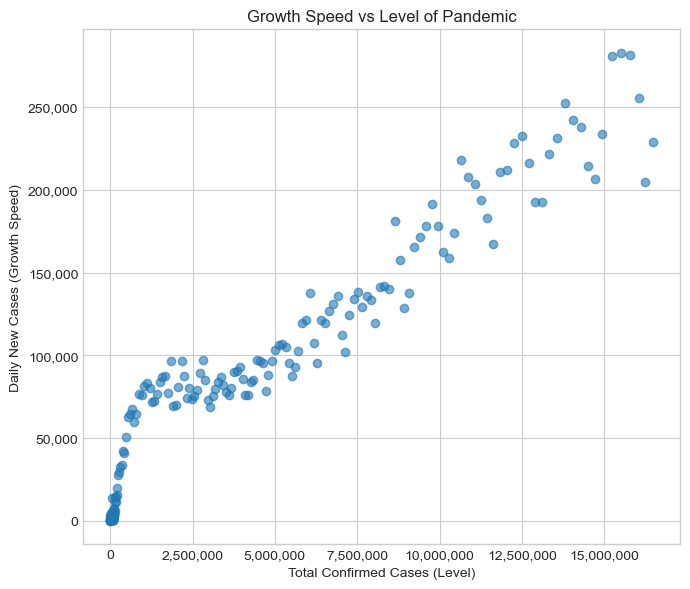

In [17]:
import matplotlib.ticker as mtick

plt.figure(figsize=(7, 6))
plt.scatter(df["Confirmed"], df["New cases"], alpha=0.6)
plt.xlabel("Total Confirmed Cases (Level)")
plt.ylabel("Daily New Cases (Growth Speed)")
plt.title("Growth Speed vs Level of Pandemic")

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


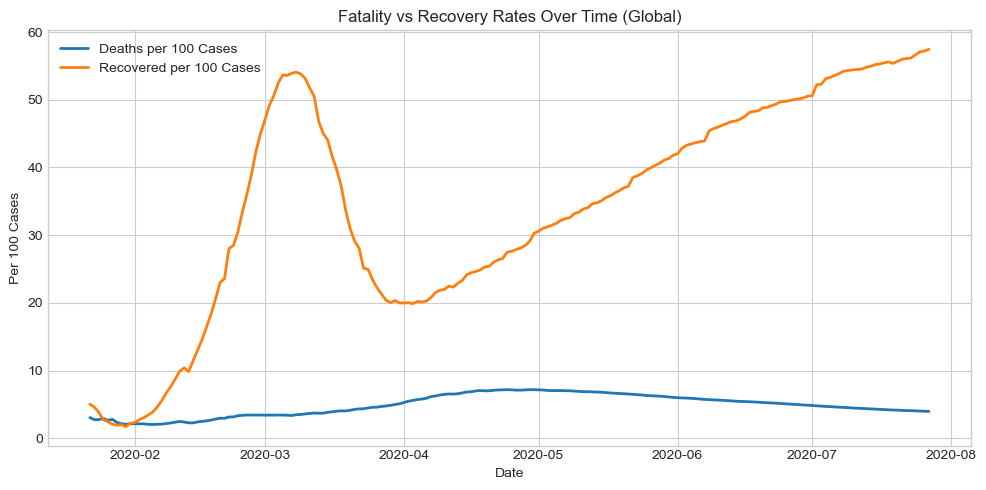

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Deaths / 100 Cases"], label="Deaths per 100 Cases", linewidth=2)
plt.plot(df["Date"], df["Recovered / 100 Cases"], label="Recovered per 100 Cases", linewidth=2)
plt.title("Fatality vs Recovery Rates Over Time (Global)")
plt.xlabel("Date")
plt.ylabel("Per 100 Cases")
plt.legend()
plt.tight_layout()
plt.show()


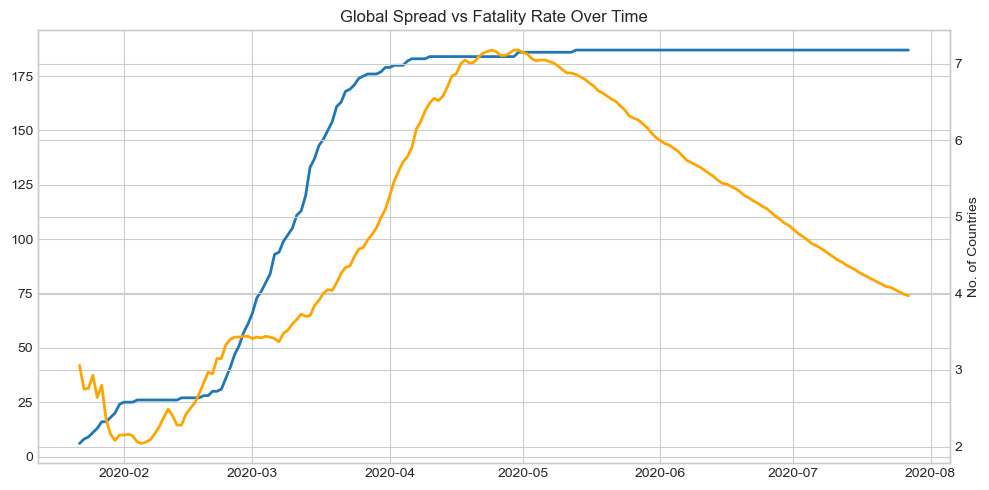

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["No. of countries"], label="No. of Countries Reporting", linewidth=2)
plt.twinx()
plt.plot(df["Date"], df["Deaths / 100 Cases"], color="orange", label="Deaths per 100 Cases", linewidth=2)
plt.title("Global Spread vs Fatality Rate Over Time")
plt.xlabel("Date")
plt.ylabel("No. of Countries")
plt.tight_layout()
plt.show()


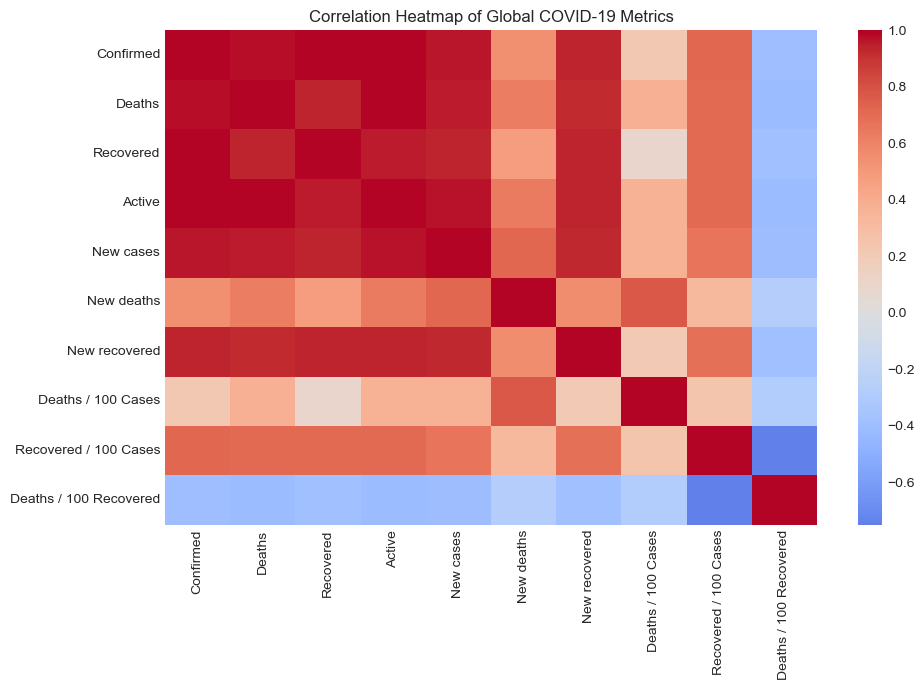

In [25]:
corr_cols = [
    "Confirmed", "Deaths", "Recovered", "Active",
    "New cases", "New deaths", "New recovered",
    "Deaths / 100 Cases", "Recovered / 100 Cases", "Deaths / 100 Recovered"
]

corr = df[corr_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Global COVID-19 Metrics")
plt.tight_layout()
plt.show()


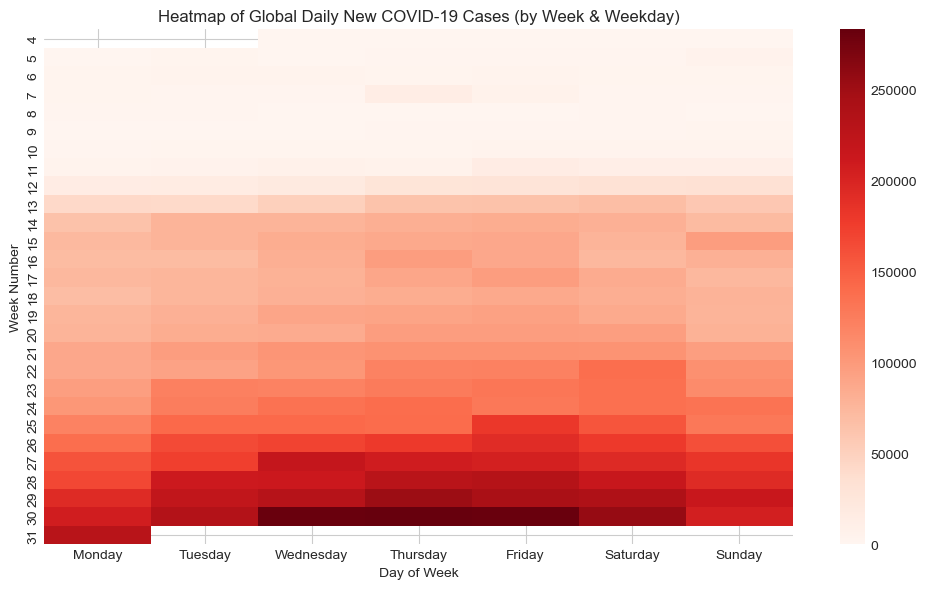

In [27]:
# Create week and weekday for heatmap layout
df["week"] = df["Date"].dt.isocalendar().week.astype(int)
df["weekday"] = df["Date"].dt.day_name()

# Order weekdays for nicer layout
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

pivot = df.pivot_table(
    values="New cases",
    index="week",
    columns="weekday",
    aggfunc="mean"
).reindex(columns=weekday_order)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="Reds")
plt.title("Heatmap of Global Daily New COVID-19 Cases (by Week & Weekday)")
plt.xlabel("Day of Week")
plt.ylabel("Week Number")
plt.tight_layout()
plt.show()


In [5]:
df.columns


Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

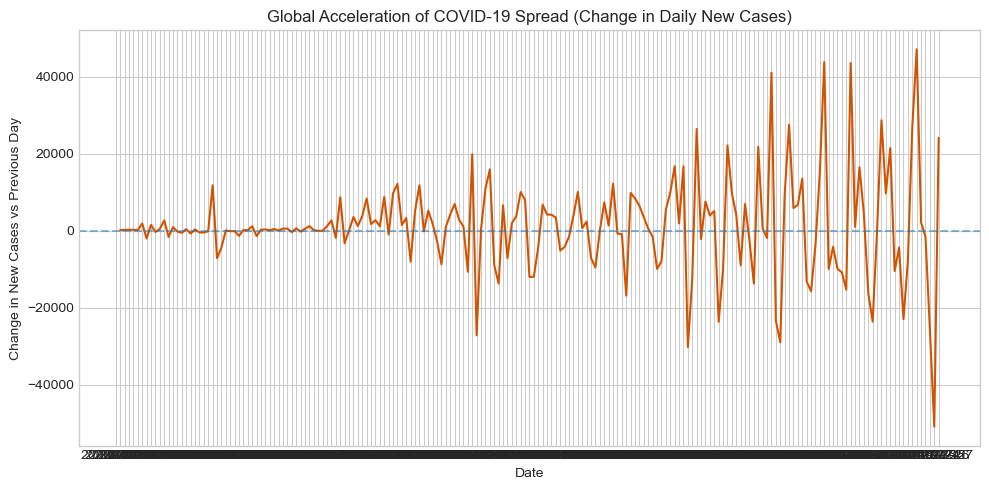

In [7]:
df["Acceleration"] = df["New cases"].diff()

plt.figure(figsize=(10,5))
plt.plot(df["Date"], df["Acceleration"], color="#d35400")
plt.axhline(0, linestyle="--", alpha=0.5)
plt.title("Global Acceleration of COVID-19 Spread (Change in Daily New Cases)")
plt.xlabel("Date")
plt.ylabel("Change in New Cases vs Previous Day")
plt.tight_layout()
plt.show()